<a href="https://www.kaggle.com/code/odins0n/amex-default-prediction-detailed-eda?scriptVersionId=96600095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Created by Sanskar Hasija**

**🚀AMEX-Default Prediction- Detailed EDA📊📈**

**26 May 2022**


# <center> AMEX-DEFAULT PREDICTION- DETAILED EDA📊 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Null Value Distribution](#4.1)
    - [4.2 Continuos and Categorical Data Distribution](#4.2)
    - [4.3 Target Distribution ](#4.3)
    - [4.4 Continuos Features Distribution  ](#4.4)
    - [4.5 Categorical Features Distribution ](#4.5)

<a id="1"></a>
# **<center><span style="color:#00BFC4;">Introduction  </span></center>**

![](https://raw.githubusercontent.com/sanskar-hasija/kaggle/main/images/amex-header.png)

**The competition is organised by `American Express` and for `Credit default prediction`**

**In this competition, you are supposed to predict predict Credit default prediction.Submissions are evaluated on a custom evaluation metric which is described as follows :**

<center><b>M = 0.5*(G+D)</b></center><br>



<b>Here G is the Normalized Gini Coefficient,and D is the default rate captured at 4%</b>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#00BFC4;">Imports  </span></center>**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import time
import warnings
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Data Loading and Preparation </span></center>**

##### I have created a Parquet version of dataset files for faster loading under the constrain of low memory in Kaggle Kernels.

#### Dataset link - www.kaggle.com/datasets/odins0n/amex-parquet
#### Example Notebook to open Parquet files from the dataset - www.kaggle.com/code/odins0n/load-parquet-files-with-low-memory

In [2]:
train = pd.read_parquet('../input/amex-parquet/train_data.parquet')
submission = pd.read_csv("../input/amex-default-prediction/sample_submission.csv")
RANDOM_STATE = 12 

In [3]:
import gc
gc.collect()

81

## <span style="color:#e76f51;"> Column Descriptions  : </span>

`customer_ID` = Unique Customer ID<br>
`- D_*` = Delinquency variables<br>
`S_*` = Spend variables<br>
`P_*` = Payment variables<br>
`B_*` = Balance variables<br>
`R_*` = Risk variables<br>



<a id="3.1"></a>
## <span style="color:#e76f51;"> Exploring Train Data : </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>190</u></b> columns and <b><u>5531451</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> Train data contains <b><u>890116722</u></b> observation with <b><u>160858968</u></b>  missing values.</i><br>
</div>

### <span style="color:#e76f51;"> Quick view of Train Data : </span>

Below are the first 5 rows of train dataset:

In [4]:
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [5]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 5531451
Number of columns in train data: 191
Number of values in train data: 895648173
Number missing values in train data: 160858968


### <span style="color:#e76f51;"> Column Wise missing values : </span>

In [6]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending = False))


D_87      5527586
D_88      5525447
D_108     5502513
D_110     5500117
D_111     5500117
           ...   
B_24            0
D_75            0
P_4             0
B_23            0
target          0
Length: 191, dtype: int64


### <span style="color:#e76f51;"> Basic statistics of training data : </span>

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [7]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
D_69,5336978.000000,0.154041,16.009655,0.000000,0.002585,0.005166,0.007750,13000.909180
R_14,5531450.000000,0.241438,8.356452,0.000000,0.002535,0.005070,0.007609,4837.304688
B_40,5531398.000000,0.203261,8.081345,0.000000,0.017393,0.058309,0.245154,5755.076172
B_10,5531451.000000,0.231600,4.799846,-0.002958,0.028991,0.110555,0.295539,4097.440918
B_26,5529435.000000,0.090620,2.588205,0.000000,0.002620,0.005237,0.007856,1499.220337
D_117,5354735.000000,2.319057,2.288730,-1.000000,-1.000000,3.000000,4.000000,6.000000
B_38,5529435.000000,2.716704,1.581322,1.000000,2.000000,2.000000,3.000000,7.000000
R_7,5531450.000000,0.088064,1.550873,0.000000,0.002569,0.005136,0.007703,449.988892
B_6,5531218.000000,0.152117,1.476770,-0.005178,0.020487,0.083385,0.191929,1214.516968
D_68,5314948.000000,5.012030,1.351339,0.000000,4.000000,6.000000,6.000000,6.000000


<a id="3.3"></a>
## <span style="color:#e76f51;"> Submission File </span>

### <span style="color:#e76f51;"> Quick view of Submission File </span>

In [8]:
submission.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#00BFC4;"> EDA </span></center>**

<a id="4.1"></a>
## <span style="color:#e76f51;"> Null Value Distribution  </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> The maximum of missing value in an row is <b><u>102</u></b> and the lowest is <b><u>9</u></b> missing values.</i><br>
* <i> All the rows have atleast <b><u>9</u></b> missing values.</i><br>
* <i> <b><u>D88 </u></b>feature hax maximum number of missing values with a total of <b><u>5527586</u></b> missing values.</i><br>
* <i> <b><u>68 </u></b> features have no missing values whereas <b><u>122</u></b> features have atleast 1 missing values </i><br>
</div>


<a id="4.2.1"></a>
### <span style="color:#e76f51;">Column wise Null Value Distribution   </span>

In [9]:
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null[train_null[0]>0]
train_null = train_null.sort_values(by = 0 ,ascending = True)
fig = px.bar(x=train_null[0],y=train_null.index,color_discrete_sequence = ["#DE3163"])
fig.update_layout(showlegend=False, 
                  title_text="Column Wise Null Value Distribution", 
                  title_x=0.5,
                  xaxis_title="Missing Value Count",
                  yaxis_title="Feature Name")
fig.show()

<a id="4.7.2"></a>
### <span style="color:#e76f51;">Row wise Null Value Distribution   </span>

In [10]:
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100

fig = px.bar(x=missing_train_row["no"], 
                     y=missing_train_row["count"] ,
             color_discrete_sequence = ["#DE3163"])
fig.update_layout(showlegend=False, 
                  title_text="Row wise Null Value Distribution", 
                  title_x=0.5,
                  xaxis_title="Number of Rows",
                  yaxis_title="Percentage of Missing Values")
fig.show()

### <span style="color:#e76f51;">Dealing with missing value (reference)  </span>
Some references on how to deal with missing value:
- [Missing Values](https://www.kaggle.com/alexisbcook/missing-values) by [Alexis Cook](https://www.kaggle.com/alexisbcook)
- [Data Cleaning Challenge: Handling missing values](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values) by [Rachael Tatman](https://www.kaggle.com/rtatman)
- [A Guide to Handling Missing values in Python ](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python) by [Parul Pandey](https://www.kaggle.com/parulpandey)

Some models that have capability to handle missing value by default are:
- XGBoost: https://xgboost.readthedocs.io/en/latest/faq.html
- LightGBM: https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html
- Catboost: https://catboost.ai/docs/concepts/algorithm-missing-values-processing.html

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
## <span style="color:#e76f51;">Continuos and Categorical Data Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i> There are a total of  <b><u>190</u></b> features, out of which  <b><u>177</u></b> features are continous, <b><u>1</u></b> feature represents date and <b><u>11</u></b> features are categorical.</i><br>
</div>

In [11]:
FEATURES = list(train.columns[2:190])
TARGET = "target"
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
cont_features = [col for col in FEATURES if col not in cat_features and TARGET]
labels=['Categorical', 'Continuos']
values= [len(cat_features), len(cont_features)]
colors = ['#DE3163', '#58D68D']

print(f'\033[94mTotal number of features: {len(FEATURES) + 2   }')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()


Total number of features: 190
Number of categorical features: 11
Number of continuos features: 177


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
## <span style="color:#e76f51;">  Target Distribution </span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>
 
* <i>There are two target values - <b><u>0</u></b> and <b><u>1</u></b>.</i><br>
* <i>Percentage of Target <b><u>0</u></b> and Target <b><u>1</u></b> are <b><u>74.11%</u></b> and <b><u>25.89%</u></b> respectively. </i><br>
</div>

In [12]:
target_df = pd.DataFrame(train['target'].value_counts()).reset_index()
target_df.columns = ['target', 'count']
fig = px.bar(data_frame =target_df, 
             x = 'target',
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Target = 0: {:.2f} %".format(target_df["count"][0]*100 / (target_df["count"][0]+ target_df["count"][1])))
print("\033[94mPercentage of Target = 1: {:.2f} %".format(target_df["count"][1]* 100 / (target_df["count"][0]+ target_df["count"][1])))
fig.show()

Percentage of Target = 0: 75.09 %
Percentage of Target = 1: 24.91 %


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
## <span style="color:#e76f51;"> Continuos Features Distribution  </span>

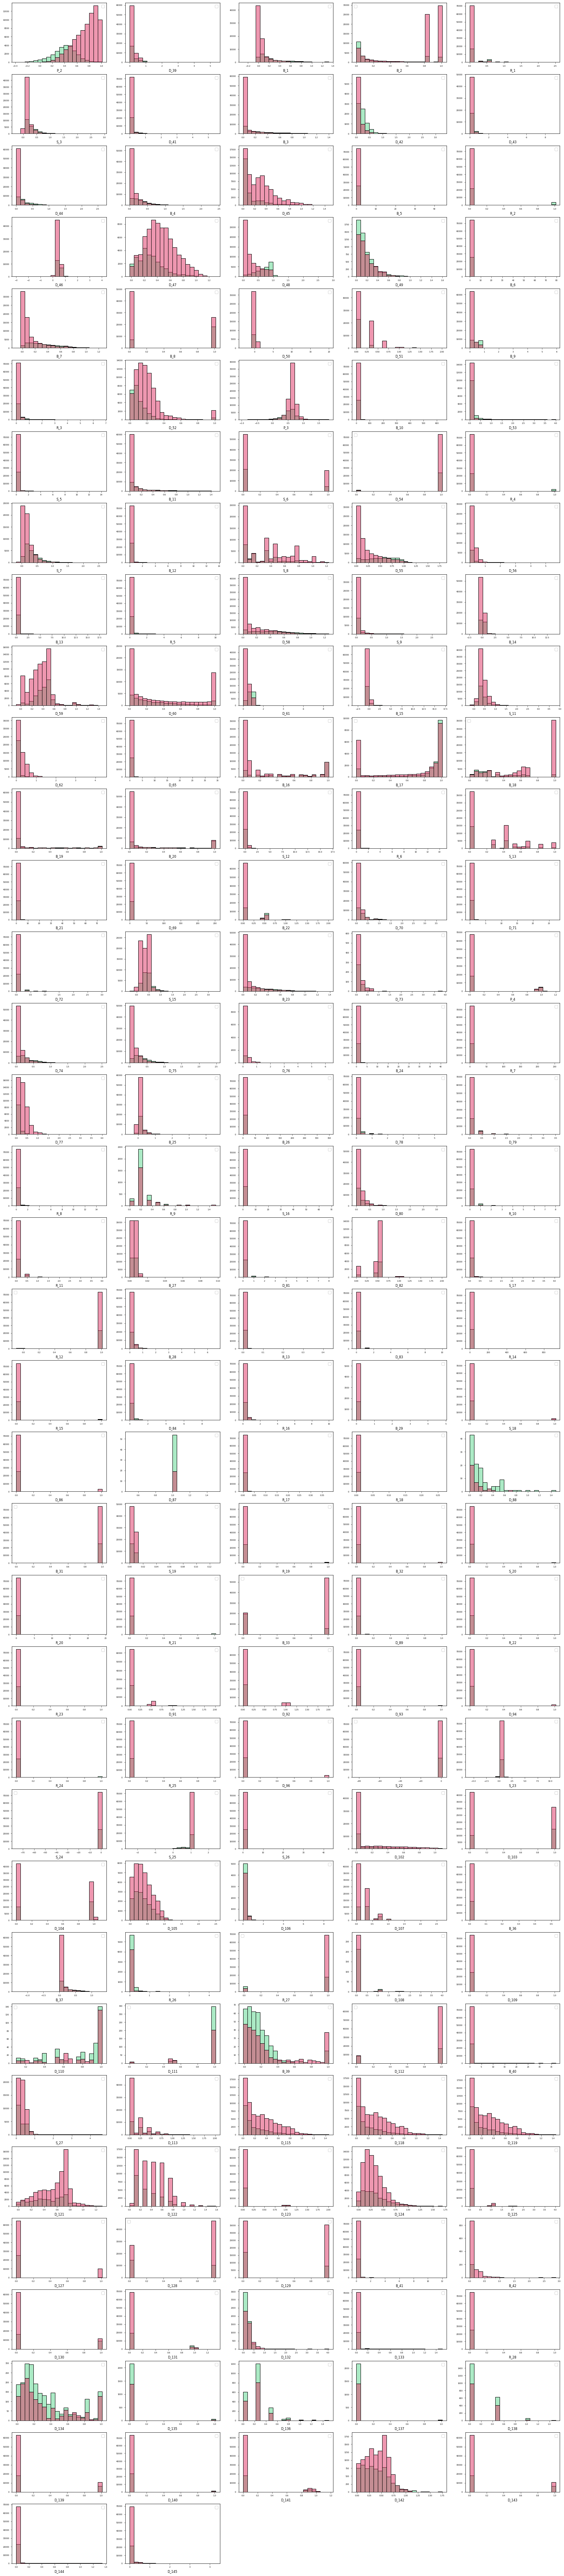

In [13]:
RANDOM_SPLIT = 100000
ncols = 5
nrows = 36
n_features = cont_features
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 15*8))

for r in range(nrows):
    for c in range(ncols):
        if r*ncols+c == len(cont_features):
            break
        col = n_features[r*ncols+c]
        sns.histplot(data= train.iloc[:RANDOM_SPLIT],  x=col, ax=axes[r, c], hue= "target", bins = 20, palette =['#DE3163','#58D68D'])
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
fig.delaxes(axes[35][2])
fig.delaxes(axes[35][3])   
fig.delaxes(axes[35][4])
plt.show()

<a id="4.5"></a>
## <span style="color:#e76f51;"> Categorical Features Distribution  </span>

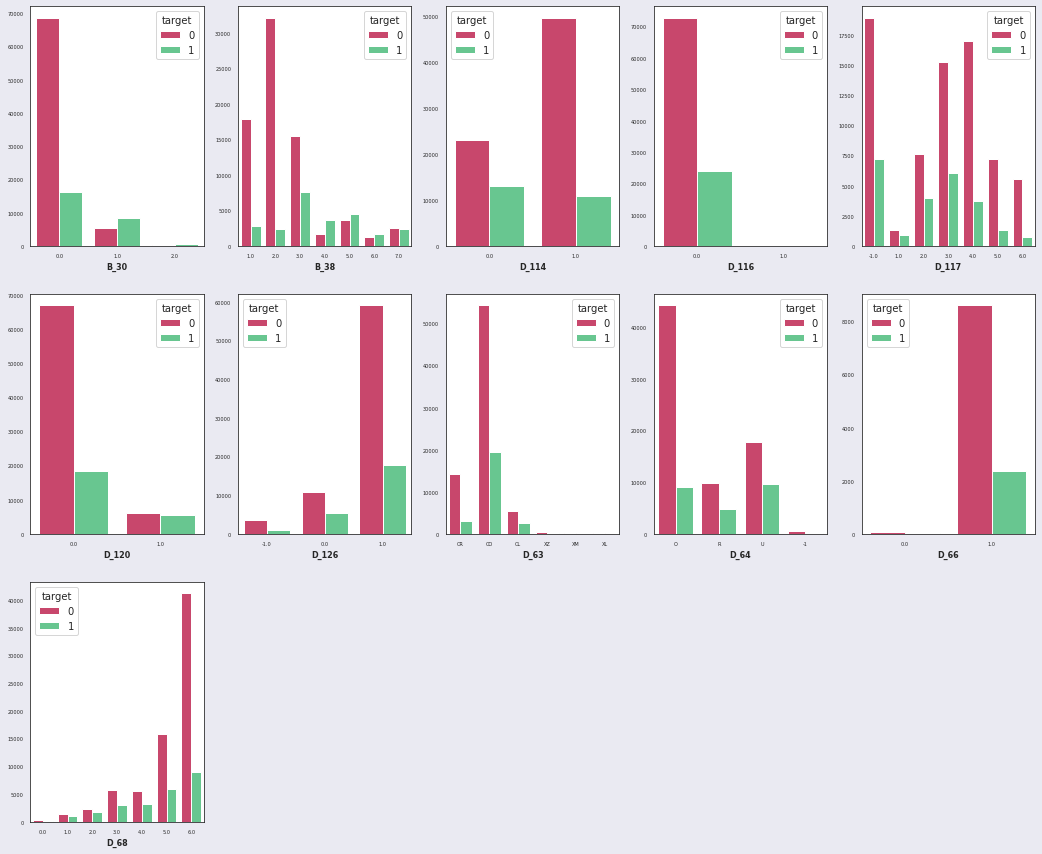

In [14]:
sns.set_style(style='white')
ncols = 5
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0)) 

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r*ncols+c >= len(cat_features):
            break
        col = cat_features[r*ncols+c]
        sns.countplot(data=train.iloc[:RANDOM_SPLIT] , x = col, ax=axes[r, c], hue = "target", palette =['#DE3163','#58D68D'])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
fig.delaxes(axes[2][1])     
fig.delaxes(axes[2][2]) 
fig.delaxes(axes[2][3]) 
fig.delaxes(axes[2][4]) 
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Work in Progress 🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
